# maxlikespy Tutorial
This will be a simple example that runs through the steps required to fit two models and run a likelihood ratio test.

The models in question are a gaussian firing field model:
$$p(t;\Theta) = a_0 + a_1T(t; \sigma_t, \mu_t)$$
Where 
$$T(t; \sigma_t, \mu_t = \exp{-((t-\mu_t)^2/2\sigma_t^2)}$$
and a simple constant term model
$$p(t;\Theta) = a_0$$

With likelihoods
$$arg min_\Theta nLL = - \sum_{trial} \sum_t[f_t\log{(p)} + (1 - f_t)\log{(1-p)}]$$
where f is the spike train

# Setup
Using `maxlikespy` requires creating an instance of two classes: DataProcessor and Pipeline.

DataProcessor takes in:
* A path to spiking data
* The neuron or neurons you want to analyze
* Optionally, if all trials are all the same length you can pass the beginning and end timestamp.

Pipeline takes in:
* The same cell range
* The DataProcessor object
* A list of models you wish to fit



In [12]:
import maxlikespy.analysis as analysis


path_to_data = "../examples/input_data/"
save_path = "../examples/input_data/"
cell_range = range(15,17)
data_processor = analysis.DataProcessor(
    path_to_data, cell_range, window=[400,2000])
pipeline = analysis.Pipeline(cell_range, data_processor, ["Gaussian", "Constant"], save_dir=save_path)



conditions.json not found
Time window provided. Assuming all trials are of equal length
spike_info not found


## Setting up parameters
The next step is to set:
* Upper and lower bounds on model parameters
* Initial parameter state for the solver

In [13]:
bounds = {
    "a_1" : [10e-10, 1 / 2],
    "ut" : [0., 2400.],
    "st" : [10., 5000.],
    "a_0" : [10e-10, 1 / 2]
}
bounds_c = {"a_0": [10e-10, 0.999]}
pipeline.set_model_bounds("Gaussian", bounds)
pipeline.set_model_bounds("Constant", bounds_c)
pipeline.set_model_x0("Gaussian", [1e-5, 400, 100, 1e-5])
pipeline.set_model_x0("Constant", [1e-5])
    

The `show_rasters()`method is useful for inspecting your cells before the fitting process

No handles with labels found to put in legend.


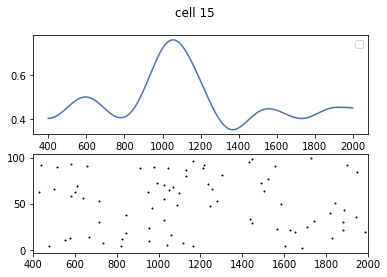

No handles with labels found to put in legend.


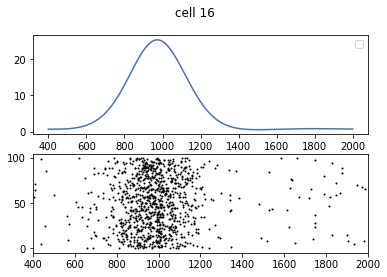

In [14]:
pipeline.show_rasters()



# Fitting Parameters

From here, all that needs to be run is `Pipeline`'s `fit_all_models` method which takes the dict of parameters as shown below. This method fits all model parameters and saves the results to disk.

In [19]:
solver_params = {
    "niter" : 30,
    "stepsize" : 1000,
    "interval" : 10,
    "method" : "TNC",
    "use_jac" : True,
    "T" : 1,
    "disp" : False
}
pipeline.fit_all_models(solver_params=solver_params)


Fitting cell 15
Fitting Gaussian
Fitting Constant
Models fit in 43.80381393432617 seconds
saving cell_fits to ../examples/input_data/
saving log_likelihoods to ../examples/input_data/
Fitting cell 16
Fitting Gaussian
Fitting Constant
Models fit in 48.61924886703491 seconds
saving cell_fits to ../examples/input_data/
saving log_likelihoods to ../examples/input_data/


{'Gaussian': {15: <models.Gaussian at 0x11d68de90>,
  16: <models.Gaussian at 0x11d68de10>},
 'Constant': {15: <models.Constant at 0x11d68d2d0>,
  16: <models.Constant at 0x11d68da90>}}

# Comparing Models

Currently `maxlikespy` supports comparing nested models via a likelihood ratio test. 

The `Pipeline` method accepts the name of two valid models and a p-value to use as a threshold. The result and figure is written to disk.

Comparing cell 15
Constant fit is: [0.00048125]
Gaussian fit is: [6.84444517e-04 1.04261912e+03 5.81322058e+01 4.18802324e-04]
665.193991673951 661.7127541431296 3
p-value is: 0.07310348622796228
saving model comparisons to ../examples/input_data/
False


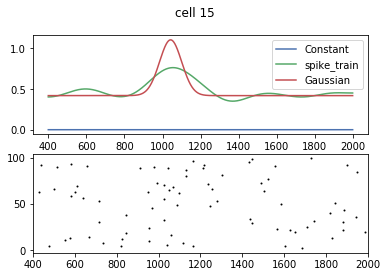

Comparing cell 16
Constant fit is: [0.00635]
Gaussian fit is: [3.30827639e-02 9.73345942e+02 1.09412939e+02 6.80094156e-04]
6153.016623829767 5180.4550059406965 3
p-value is: 0.0
saving model comparisons to ../examples/input_data/
True


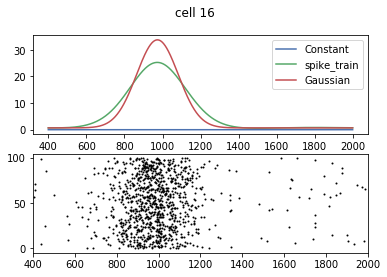

In [20]:
pipeline.compare_models("Constant", "Gaussian", 0.01, 100)